In [ ]:
!pip install roboflow

from roboflow import Roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 18.2 MB/s eta 0:00:00


In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="RzzszKNjXfl6NRMOjHyR")
project = rf.workspace("binus-p67er").project("judol-detection-v2")
version = project.version(9)
dataset = version.download("yolov11")






loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to Judol-Detection-v2-9 in yolov11:: 100%|██████████| 2146/2146 [00:00<00:00, 5382.21it/s]


In [ ]:
print(dataset.location)

/content/Judol-Detection-v2-9


In [ ]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)

dataset_yaml["train"] = f"{dataset.location}/train/images"
dataset_yaml["val"] = f"{dataset.location}/valid/images"
dataset_yaml["test"] = f"{dataset.location}/test/images"

with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)


In [ ]:
pip show ultralytics


Name: ultralytics
Version: 8.3.50
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


patience = 3 weight_decay = 0.0005 val = true dropout = 0.1 not used


In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model=yolo11m.pt optimizer=auto epochs=25 imgsz=640 lr0=0.001 plots=True weight_decay = 0.0005 patience = 5

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/Judol-Detection-v2-9/data.yaml, epochs=25, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [ ]:
from IPython.display import Image, display

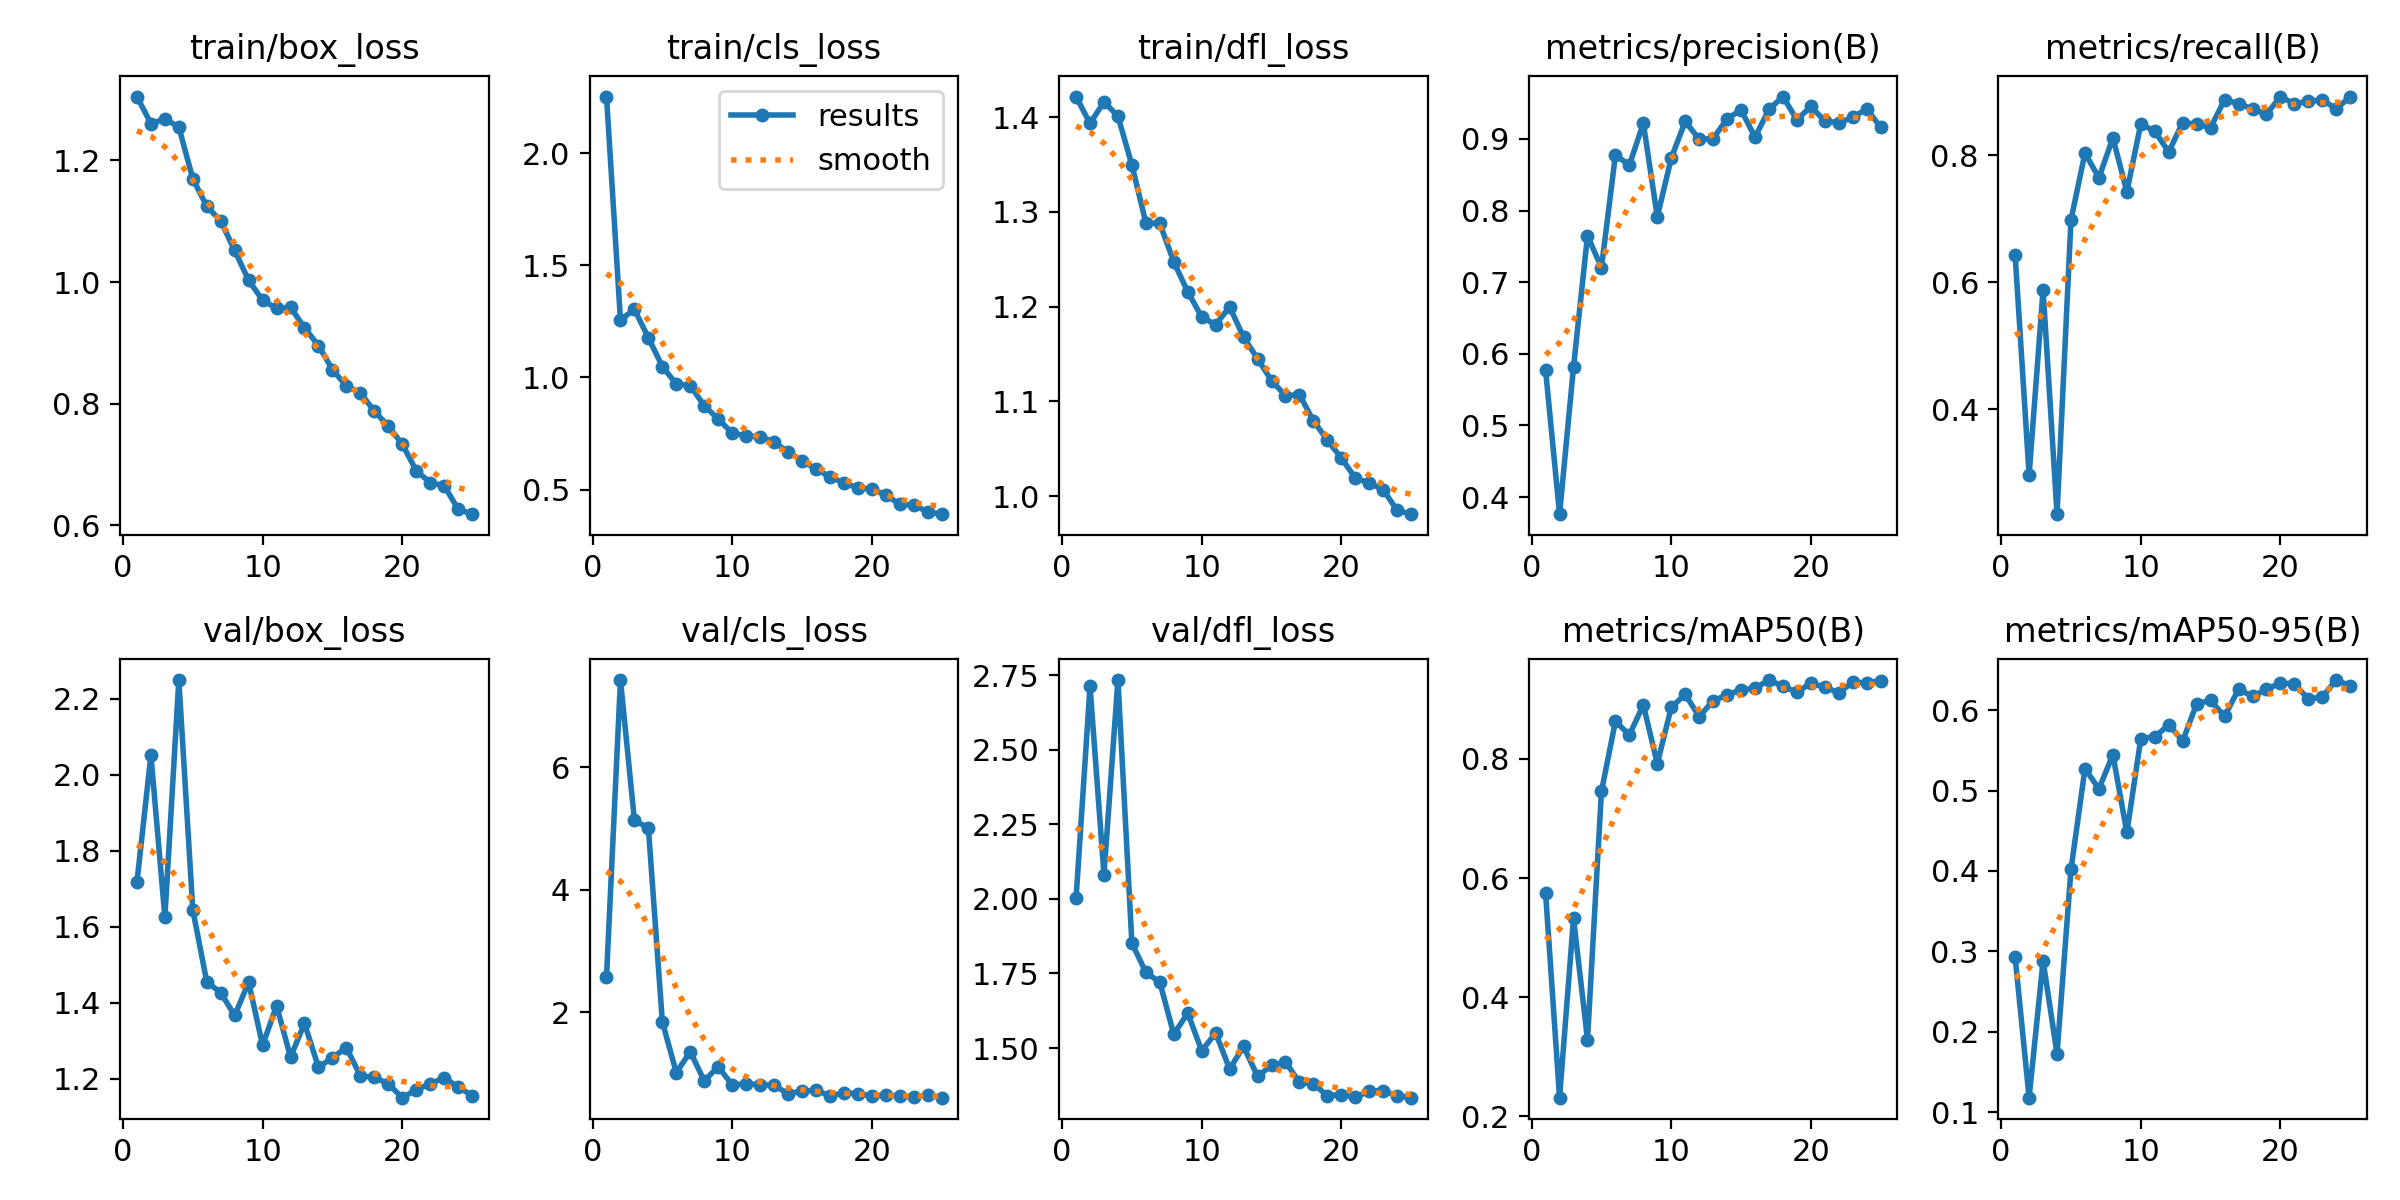

In [ ]:
display(Image(filename='runs/detect/train2/results.png'))

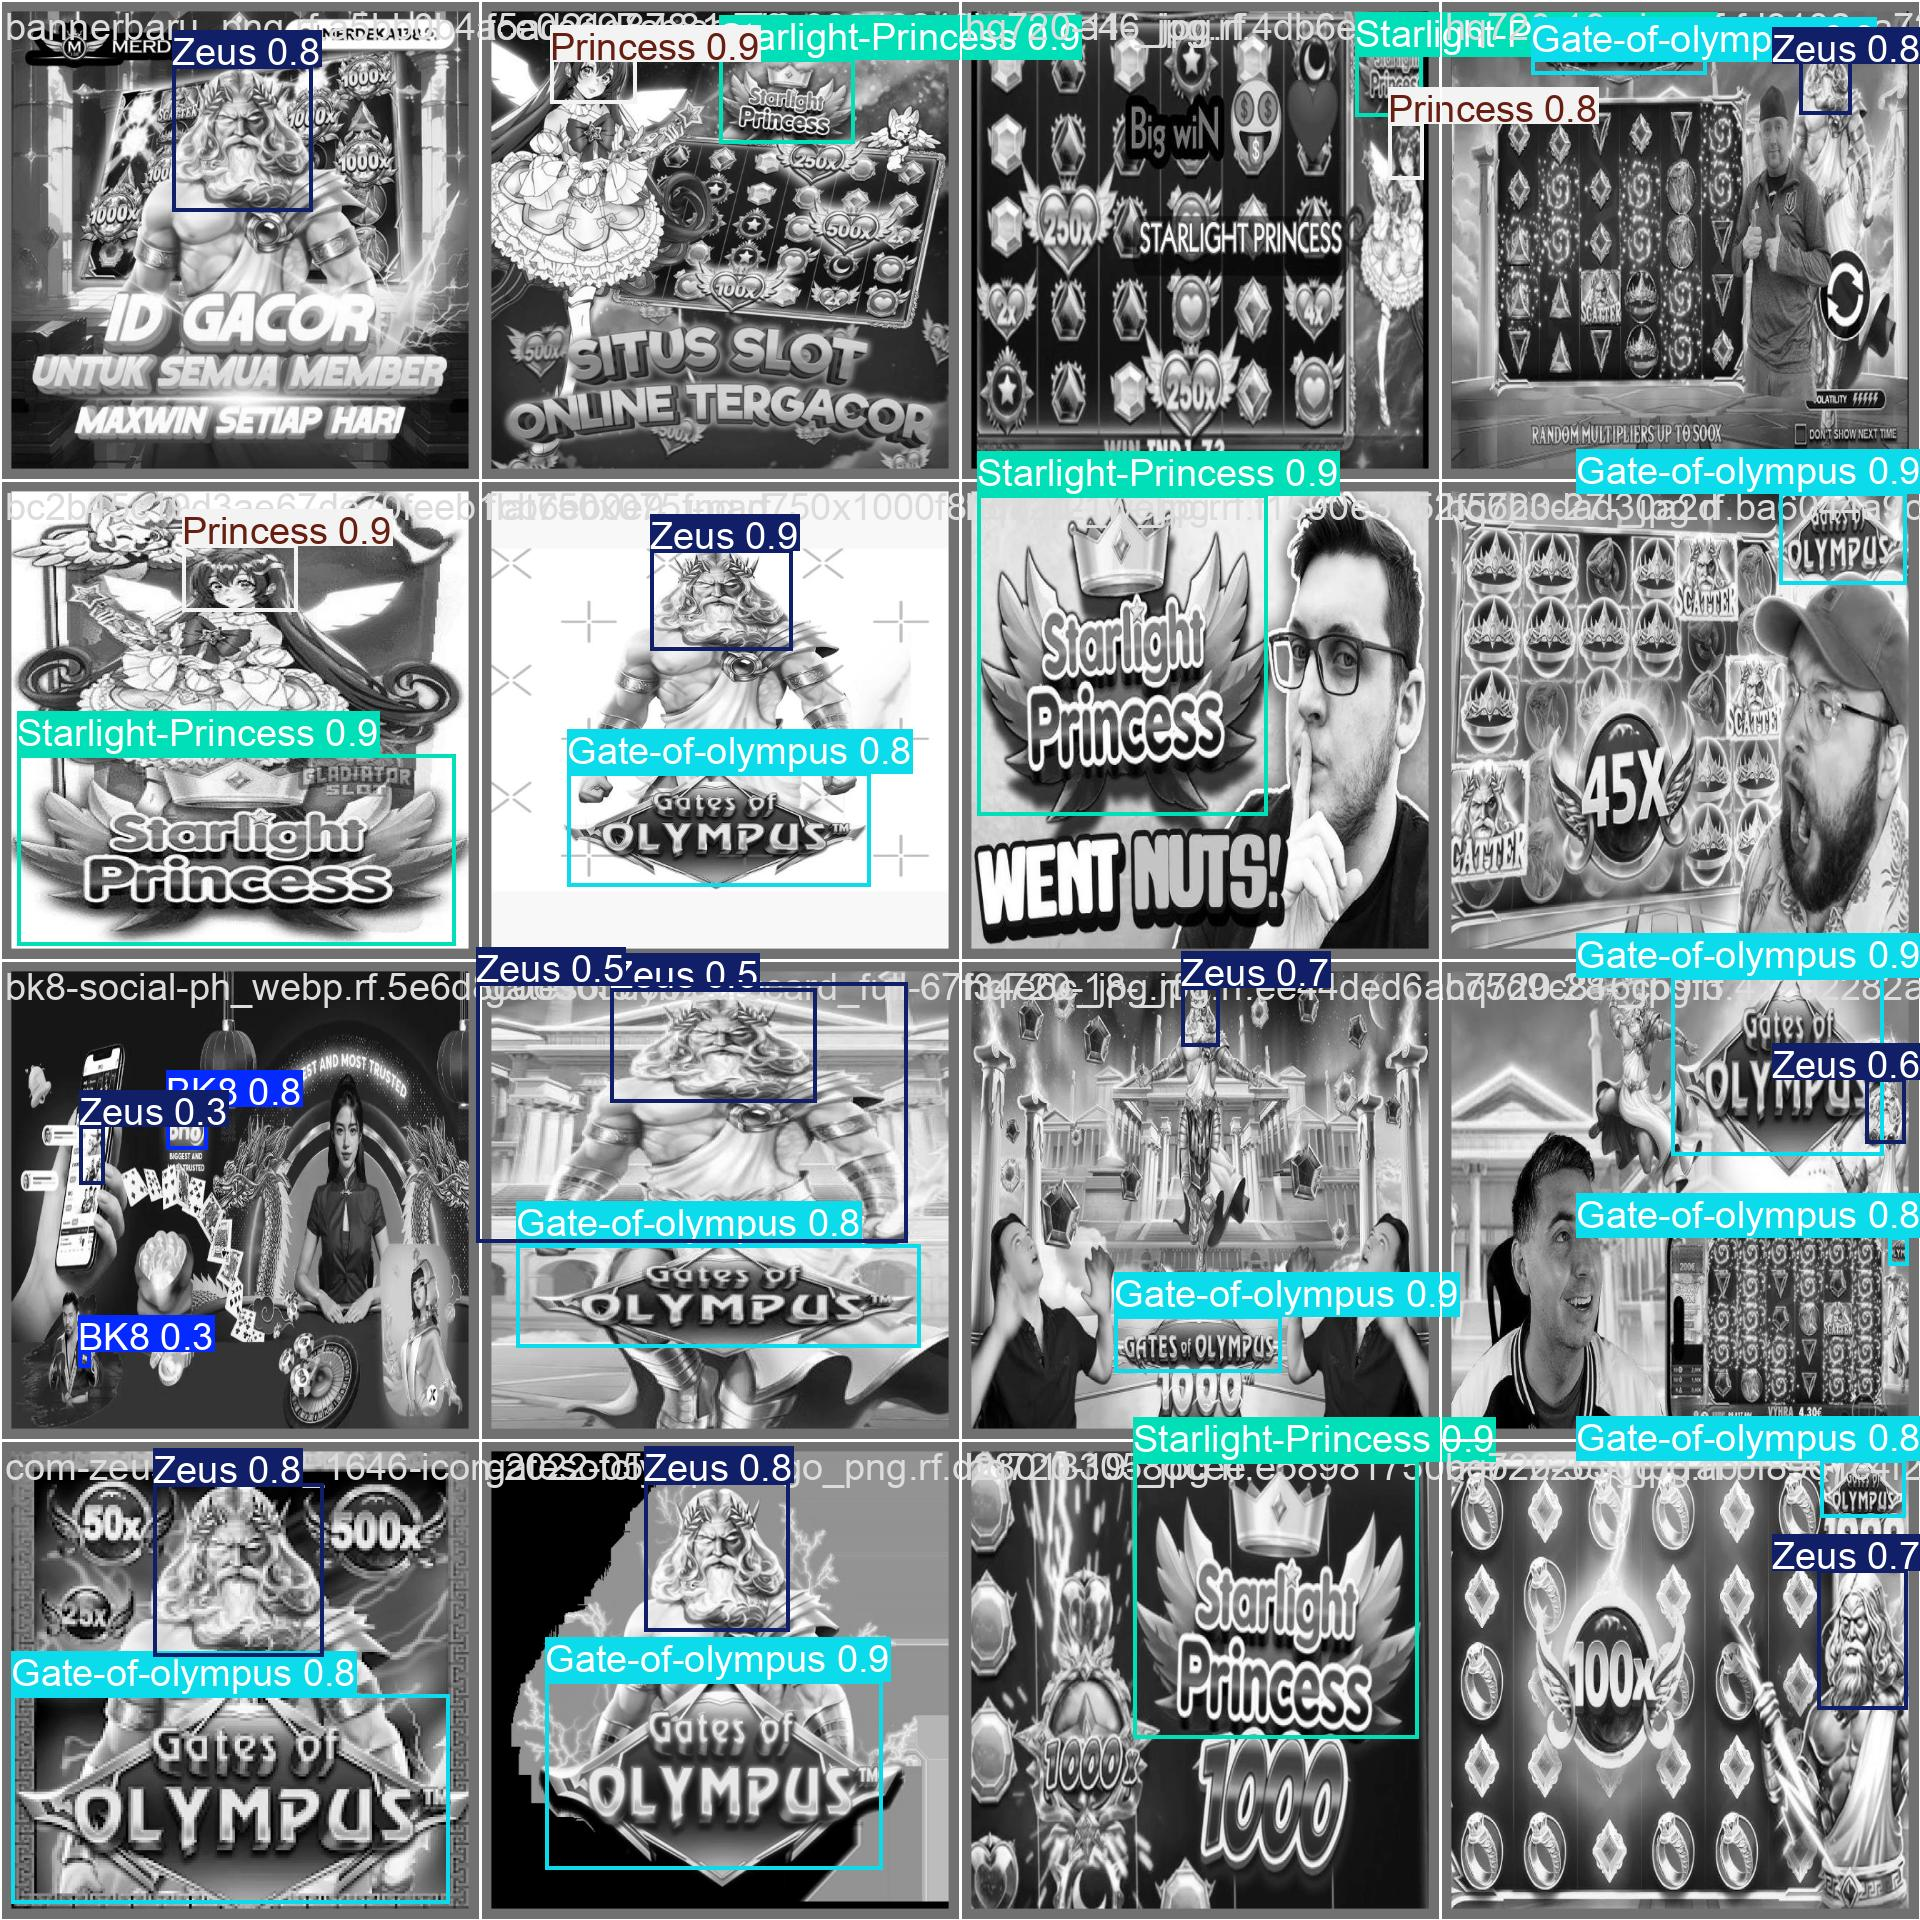

In [ ]:
display(Image(filename='runs/detect/train2/val_batch1_pred.jpg', width = 800))

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/Judol-Detection-v2-9/valid/labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100% 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.47it/s]
                   all         91        177      0.942      0.874      0.928      0.636
                   BK8         20         39      0.939       0.79      0.843      0.532
       Gate-of-olympus         36         39      0.948      0.928      0.963      0.578
              Princess         19         25       0.89          1      0.978       0.62
    Starlight-Princess         19         21      0.984      0.952      0.969      0.814
                  Zeus         44         53      0.949        0.7      0.888      0.637
Speed: 1.9ms preprocess, 27.1ms inference, 0